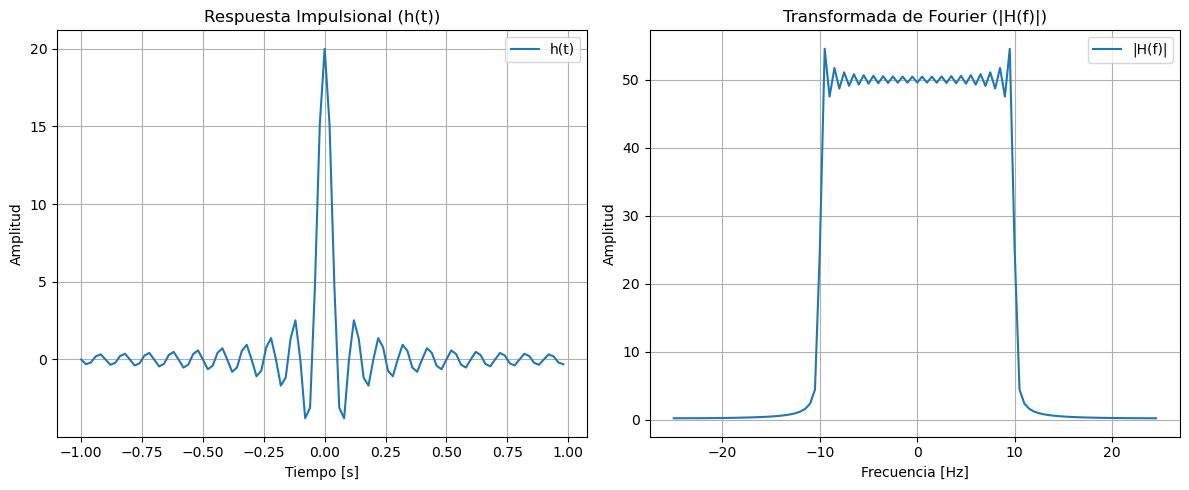

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del filtro
f_c = 10  # Frecuencia de corte
fs = 100  # Frecuencia de muestreo
t = np.linspace(-1, 1, fs, endpoint=False)  # Vector de tiempo

# Respuesta impulsional en el dominio temporal
h = 2 * f_c * np.sinc(2 * f_c * t)

# Transformada de Fourier
H = np.fft.fftshift(np.fft.fft(h))
f = np.fft.fftshift(np.fft.fftfreq(len(H), d=t[1] - t[0]))

# Graficar la respuesta impulsional y la respuesta en frecuencia
plt.figure(figsize=(12, 5))

# Respuesta impulsional en el dominio temporal
plt.subplot(1, 2, 1)
plt.plot(t, h, label='h(t)')
plt.title('Respuesta Impulsional (h(t))')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# Respuesta en frecuencia del filtro
plt.subplot(1, 2, 2)
plt.plot(f, np.abs(H), label='|H(f)|')
plt.title('Transformada de Fourier (|H(f)|)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


Introduzca el orden del filtro:  200
Introduzca la frecuencia de corte en radianes (por ejemplo, 0.3*np.pi):  0.3


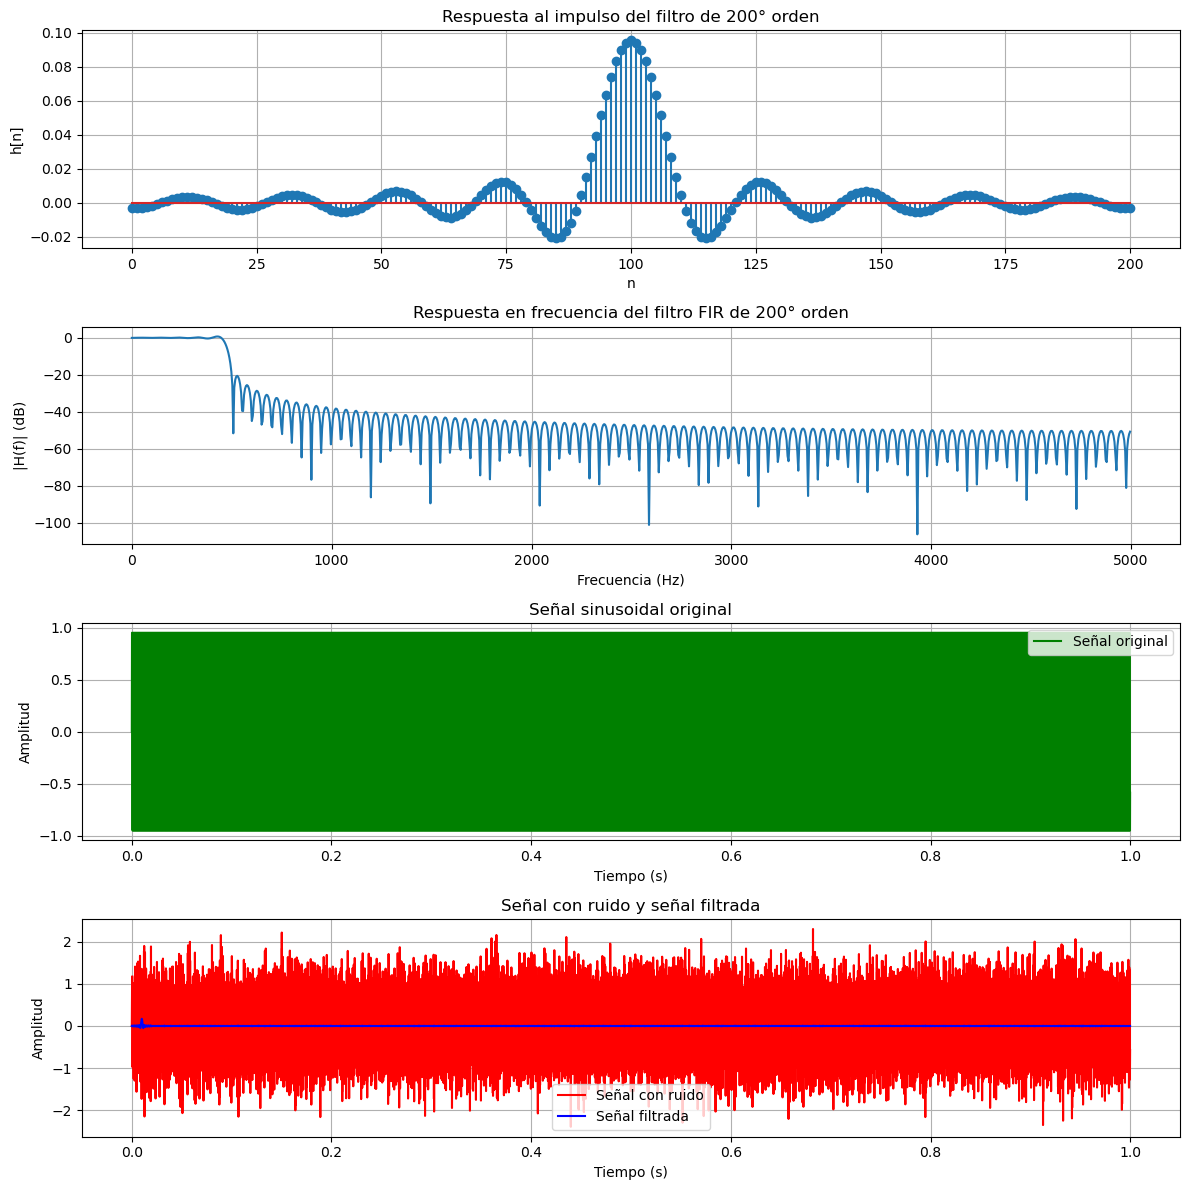

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, freqz, lfilter

# Parámetros del filtro
M = int(input('Introduzca el orden del filtro: '))
wc = eval(input('Introduzca la frecuencia de corte en radianes (por ejemplo, 0.3*np.pi): '))  # Evalúa la expresión en radianes

# Diseño del filtro FIR pasa bajas
n = np.arange(0, M+1)  # Vector de índices
h_LP = np.zeros(M+1)  # Inicializar el filtro con ceros para evitar errores de división

# Calcular los coeficientes del filtro
for i in range(M+1):
    if i == M/2:  # Evitar la división por cero en el punto central
        h_LP[i] = wc / np.pi
    else:
        h_LP[i] = np.sin(wc * (i - M / 2)) / (np.pi * (i - M / 2))

# Parámetros de la señal
fc = 3000  # Frecuencia de corte (en Hz)
fs = 10000  # Frecuencia de muestreo (en Hz)
t = np.arange(0, 1, 1/fs)  # Tiempo de 1 segundo

# Generación de la señal sinusoidal y ruido aleatorio de alta frecuencia
f_sin = 1000  # Frecuencia de la señal sinusoidal
sin_signal = np.sin(2 * np.pi * f_sin * t)  # Señal sinusoidal pura de 1000 Hz

# Generación de ruido aleatorio con frecuencia mayor a 4000 Hz
noise = np.random.randn(len(t))  # Ruido blanco aleatorio
b, a = butter(4, 4000 / (fs / 2), btype='high')  # Filtro pasa altas para aislar ruido > 4000 Hz
high_freq_noise = filtfilt(b, a, noise)  # Ruido filtrado de alta frecuencia

# Señal ruidosa
noisy_signal = sin_signal + high_freq_noise  # Señal original con ruido agregado

# Filtrado de la señal ruidosa con el filtro FIR pasa bajas
filtered_signal = lfilter(h_LP, 1, noisy_signal)  # Aplica filtro FIR a la señal con ruido

# Visualización
plt.figure(figsize=(12, 12))  # Ajustar el tamaño para incluir las nuevas gráficas

# Respuesta al impulso del filtro
plt.subplot(4, 1, 1)
plt.stem(n, h_LP)  # Omitir 'use_line_collection=True' si no es compatible
plt.title(f'Respuesta al impulso del filtro de {M}° orden')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid()

# Respuesta en frecuencia del filtro
w, H_LP = freqz(h_LP, worN=1024, fs=fs)  # Calcula la respuesta en frecuencia
plt.subplot(4, 1, 2)
plt.plot(w, 20 * np.log10(np.abs(H_LP)))  # Magnitud de la respuesta en frecuencia en dB
plt.title(f'Respuesta en frecuencia del filtro FIR de {M}° orden')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('|H(f)| (dB)')
plt.grid()

# Señal sinusoidal original
plt.subplot(4, 1, 3)
plt.plot(t, sin_signal, 'g', label='Señal original')
plt.title('Señal sinusoidal original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Señal con ruido y señal filtrada
plt.subplot(4, 1, 4)
plt.plot(t, noisy_signal, 'r', label='Señal con ruido')
plt.plot(t, filtered_signal, 'b', label='Señal filtrada')
plt.title('Señal con ruido y señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


Introduzca el orden del filtro:  5
Introduzca la frecuencia de corte en radianes (por ejemplo, 0.3*np.pi):  0.3


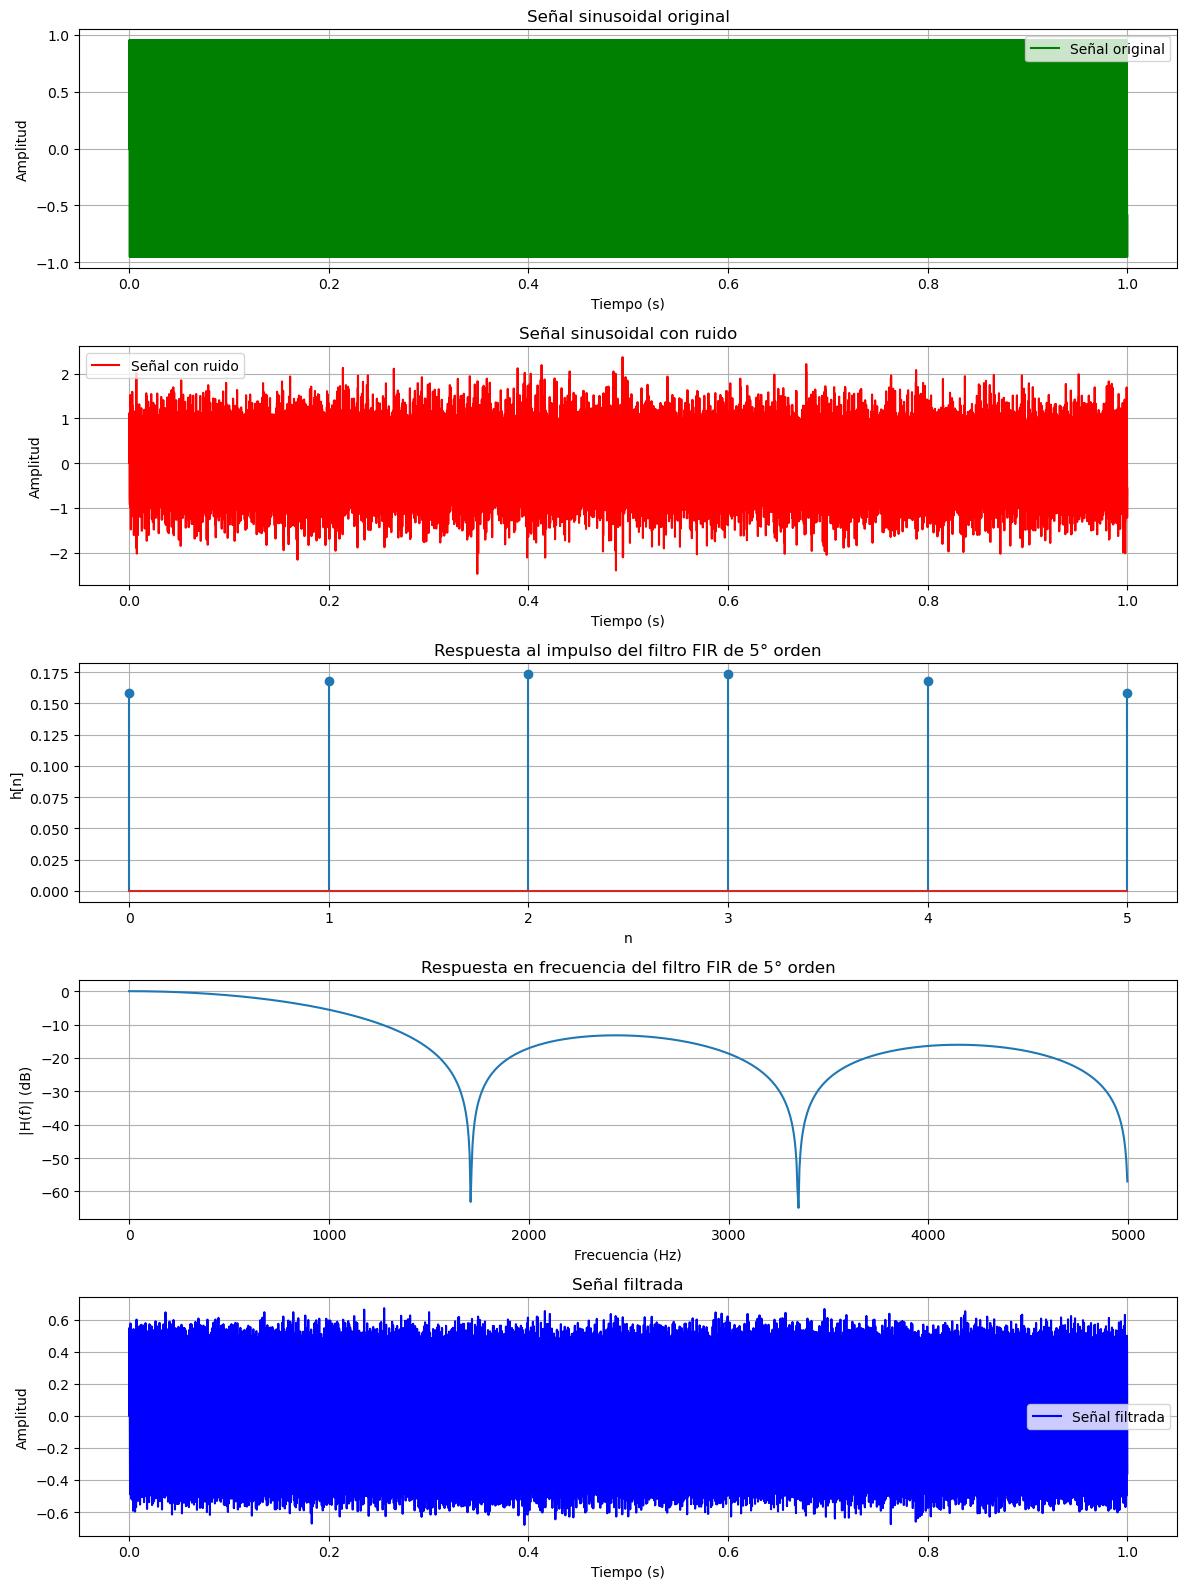

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, freqz, lfilter

# Parámetros del filtro
M = int(input('Introduzca el orden del filtro: '))
wc = eval(input('Introduzca la frecuencia de corte en radianes (por ejemplo, 0.3*np.pi): '))  # Evalúa la expresión en radianes

# Diseño del filtro FIR pasa bajas
n = np.arange(0, M+1)  # Vector de índices
h_LP = np.zeros(M+1)  # Inicializar el filtro con ceros

# Calcular los coeficientes del filtro
for i in range(M+1):
    if i == M / 2:  # Evitar la división por cero en el punto central
        h_LP[i] = wc / np.pi
    else:
        h_LP[i] = np.sin(wc * (i - M / 2)) / (np.pi * (i - M / 2))

# Normalizar los coeficientes del filtro
h_LP /= np.sum(h_LP)

# Parámetros de la señal
fc = 3000  # Frecuencia de corte (en Hz)
fs = 10000  # Frecuencia de muestreo (en Hz)
t = np.arange(0, 1, 1/fs)  # Tiempo de 1 segundo

# Generación de la señal sinusoidal y ruido aleatorio de alta frecuencia
f_sin = 1000  # Frecuencia de la señal sinusoidal
sin_signal = np.sin(2 * np.pi * f_sin * t)  # Señal sinusoidal pura de 1000 Hz

# Generación de ruido aleatorio con frecuencia mayor a 4000 Hz
noise = np.random.randn(len(t))  # Ruido blanco aleatorio
b, a = butter(4, 4000 / (fs / 2), btype='high')  # Filtro pasa altas para aislar ruido > 4000 Hz
high_freq_noise = filtfilt(b, a, noise)  # Ruido filtrado de alta frecuencia

# Señal ruidosa
noisy_signal = sin_signal + high_freq_noise  # Señal original con ruido agregado

# Filtrado de la señal ruidosa con el filtro FIR pasa bajas
filtered_signal = lfilter(h_LP, 1, noisy_signal)  # Aplica filtro FIR a la señal con ruido

# Visualización
plt.figure(figsize=(12, 16))  # Ajustar el tamaño para incluir las gráficas

# 1. Señal sinusoidal original
plt.subplot(5, 1, 1)
plt.plot(t, sin_signal, 'g', label='Señal original')
plt.title('Señal sinusoidal original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# 2. Señal con ruido
plt.subplot(5, 1, 2)
plt.plot(t, noisy_signal, 'r', label='Señal con ruido')
plt.title('Señal sinusoidal con ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# 3. Respuesta al impulso del filtro
plt.subplot(5, 1, 3)
plt.stem(n, h_LP)  # Sin el argumento 'use_line_collection'
plt.title(f'Respuesta al impulso del filtro FIR de {M}° orden')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid()

# 4. Respuesta en frecuencia del filtro
w, H_LP = freqz(h_LP, worN=1024, fs=fs)  # Calcula la respuesta en frecuencia
plt.subplot(5, 1, 4)
plt.plot(w, 20 * np.log10(np.abs(H_LP)))  # Magnitud de la respuesta en frecuencia en dB
plt.title(f'Respuesta en frecuencia del filtro FIR de {M}° orden')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('|H(f)| (dB)')
plt.grid()

# 5. Señal filtrada
plt.subplot(5, 1, 5)
plt.plot(t, filtered_signal, 'b', label='Señal filtrada')
plt.title('Señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


Introduzca el orden del filtro (recomendado entre 10 y 30):  10
Introduzca la frecuencia de corte en radianes (por ejemplo, 0.3*np.pi):  0.3


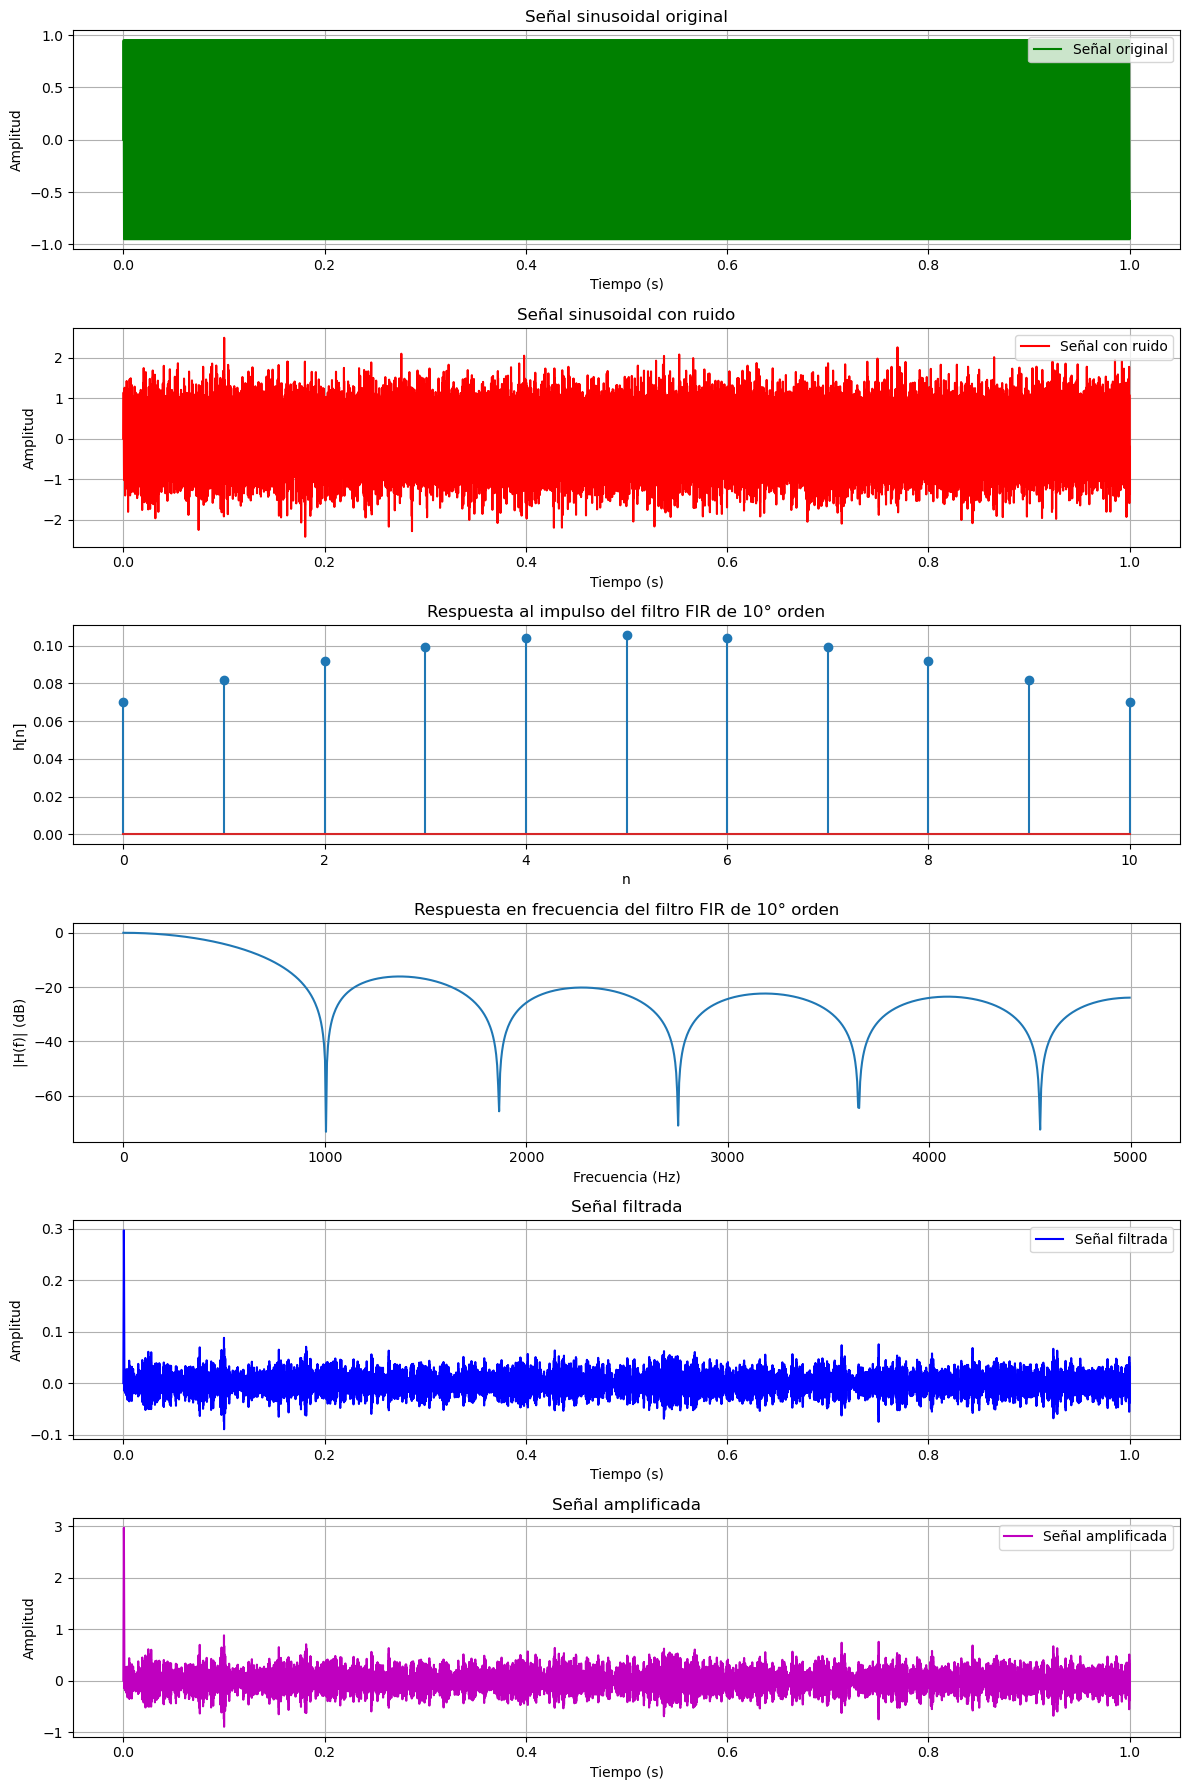

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, freqz, lfilter

# Parámetros del filtro
M = int(input('Introduzca el orden del filtro (recomendado entre 10 y 30): '))
wc = eval(input('Introduzca la frecuencia de corte en radianes (por ejemplo, 0.3*np.pi): '))  # Evalúa la expresión en radianes

# Diseño del filtro FIR pasa bajas
n = np.arange(0, M + 1)  # Vector de índices
h_LP = np.zeros(M + 1)  # Inicializar el filtro con ceros

# Calcular los coeficientes del filtro
for i in range(M + 1):
    if i == M / 2:  # Evitar la división por cero en el punto central
        h_LP[i] = wc / np.pi
    else:
        h_LP[i] = np.sin(wc * (i - M / 2)) / (np.pi * (i - M / 2))

# Normalizar los coeficientes del filtro
h_LP /= np.sum(h_LP)

# Parámetros de la señal
fc = 3000  # Frecuencia de corte (en Hz)
fs = 10000  # Frecuencia de muestreo (en Hz)
t = np.arange(0, 1, 1/fs)  # Tiempo de 1 segundo

# Generación de la señal sinusoidal y ruido aleatorio de alta frecuencia
f_sin = 1000  # Frecuencia de la señal sinusoidal
sin_signal = np.sin(2 * np.pi * f_sin * t)  # Señal sinusoidal pura de 1000 Hz

# Generación de ruido aleatorio con frecuencia mayor a 4000 Hz
noise = np.random.randn(len(t))  # Ruido blanco aleatorio
b, a = butter(4, 4000 / (fs / 2), btype='high')  # Filtro pasa altas para aislar ruido > 4000 Hz
high_freq_noise = filtfilt(b, a, noise)  # Ruido filtrado de alta frecuencia

# Señal ruidosa
noisy_signal = sin_signal + high_freq_noise  # Señal original con ruido agregado

# Filtrado de la señal ruidosa con el filtro FIR pasa bajas
filtered_signal = lfilter(h_LP, 1, noisy_signal)  # Aplica filtro FIR a la señal con ruido

# Ajuste de amplificación para que la señal filtrada se parezca a la original
gain = 10  # Factor de amplificación (ajusta este valor según sea necesario)
amplified_signal = gain * filtered_signal  # Señal amplificada

# Visualización
plt.figure(figsize=(12, 18))  # Ajustar el tamaño para incluir las gráficas

# 1. Señal sinusoidal original
plt.subplot(6, 1, 1)
plt.plot(t, sin_signal, 'g', label='Señal original')
plt.title('Señal sinusoidal original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# 2. Señal con ruido
plt.subplot(6, 1, 2)
plt.plot(t, noisy_signal, 'r', label='Señal con ruido')
plt.title('Señal sinusoidal con ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# 3. Respuesta al impulso del filtro
plt.subplot(6, 1, 3)
plt.stem(n, h_LP)  # Sin el argumento 'use_line_collection'
plt.title(f'Respuesta al impulso del filtro FIR de {M}° orden')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid()

# 4. Respuesta en frecuencia del filtro
w, H_LP = freqz(h_LP, worN=1024, fs=fs)  # Calcula la respuesta en frecuencia
plt.subplot(6, 1, 4)
plt.plot(w, 20 * np.log10(np.abs(H_LP)))  # Magnitud de la respuesta en frecuencia en dB
plt.title(f'Respuesta en frecuencia del filtro FIR de {M}° orden')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('|H(f)| (dB)')
plt.grid()

# 5. Señal filtrada
plt.subplot(6, 1, 5)
plt.plot(t, filtered_signal, 'b', label='Señal filtrada')
plt.title('Señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# 6. Señal amplificada
plt.subplot(6, 1, 6)
plt.plot(t, amplified_signal, 'm', label='Señal amplificada')
plt.title('Señal amplificada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


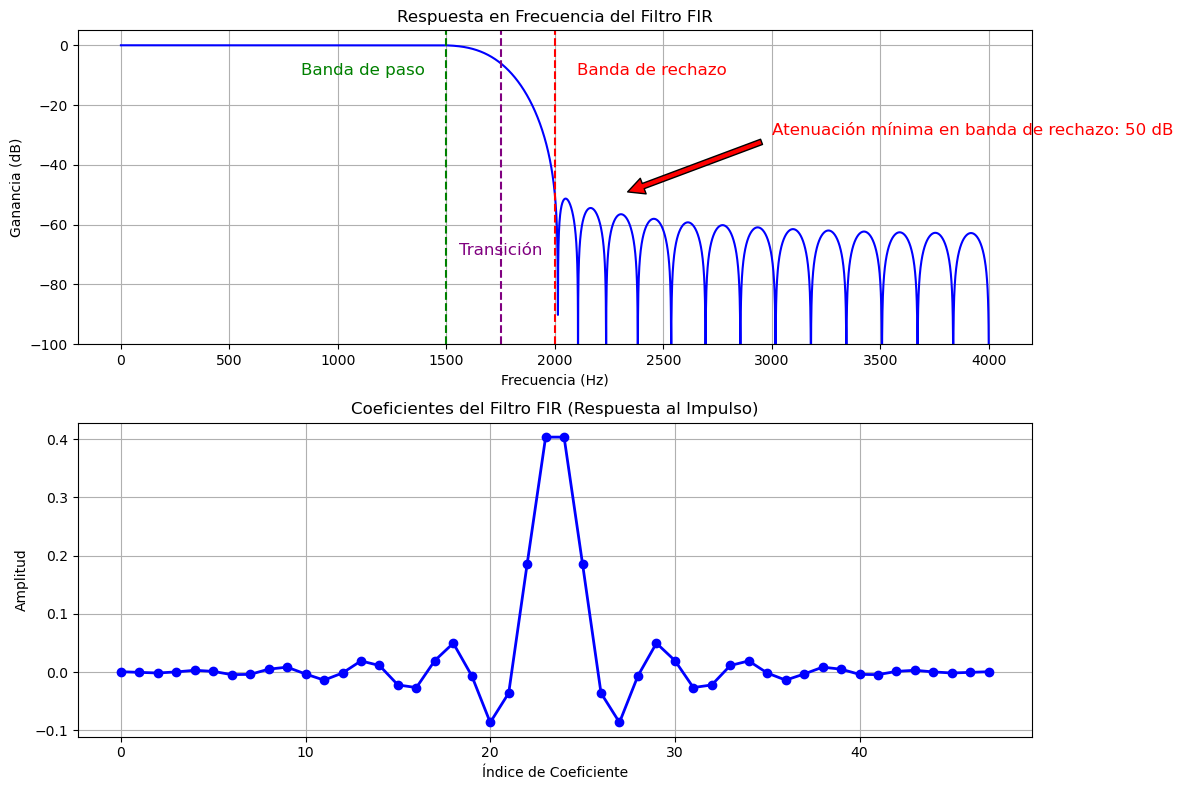

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import kaiserord, firwin, freqz

# Especificaciones del filtro
fs = 8000  # Frecuencia de muestreo (Hz)
f_pass = 1500  # Frecuencia de banda de paso (Hz)
f_stop = 2000  # Frecuencia de banda de rechazo (Hz)
delta_f = f_stop - f_pass  # Ancho de banda de transición (Hz)
attenuation = 50  # Atenuación mínima en banda de rechazo (dB)

# Calcular la frecuencia de corte (frecuencia media entre f_pass y f_stop)
f_corte = (f_pass + f_stop) / 2

# Normalizar las frecuencias con respecto a la frecuencia de muestreo
nyquist = fs / 2
f_corte_normalizada = f_corte / nyquist

# Calcular el orden del filtro y la beta de la ventana de Kaiser
numtaps, beta = kaiserord(attenuation, delta_f / nyquist)

# Diseñar el filtro FIR usando una ventana de Kaiser
fir_coeff = firwin(numtaps, f_corte_normalizada, window=('kaiser', beta))

# Calcular la respuesta en frecuencia del filtro
w, h = freqz(fir_coeff, worN=8000)

# Graficar la respuesta en frecuencia del filtro con etiquetas
plt.figure(figsize=(12, 8))

# Gráfico de la respuesta en frecuencia
plt.subplot(2, 1, 1)
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.ylim(-100, 5)
plt.grid()

# Añadir líneas y etiquetas a las bandas y frecuencia de corte
plt.axvline(f_pass, color='green', linestyle='--', label=f'Banda de paso: {f_pass} Hz')
plt.axvline(f_stop, color='red', linestyle='--', label=f'Banda de rechazo: {f_stop} Hz')
plt.axvline(f_corte, color='purple', linestyle='--', label=f'Frecuencia de corte: {f_corte:.1f} Hz')

# Ajustar la posición exacta de los textos en la gráfica
plt.text(f_pass - 100, -10, 'Banda de paso', color='green', fontsize=12, ha='right')
plt.text(f_stop + 100, -10, 'Banda de rechazo', color='red', fontsize=12, ha='left')
plt.text(f_corte, -70, 'Transición', color='purple', fontsize=12, ha='center')

# Ajustar la posición de la anotación de la atenuación mínima
plt.annotate('Atenuación mínima en banda de rechazo: 50 dB', 
             xy=(f_stop + 300, -50), xytext=(f_stop + 1000, -30),  # Subir la anotación un poco
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

# Graficar la respuesta al impulso del filtro
plt.subplot(2, 1, 2)
plt.plot(fir_coeff, 'bo-', linewidth=2)
plt.title('Coeficientes del Filtro FIR (Respuesta al Impulso)')
plt.xlabel('Índice de Coeficiente')
plt.ylabel('Amplitud')
plt.grid()
plt.tight_layout()

# Mostrar la gráfica
plt.show()


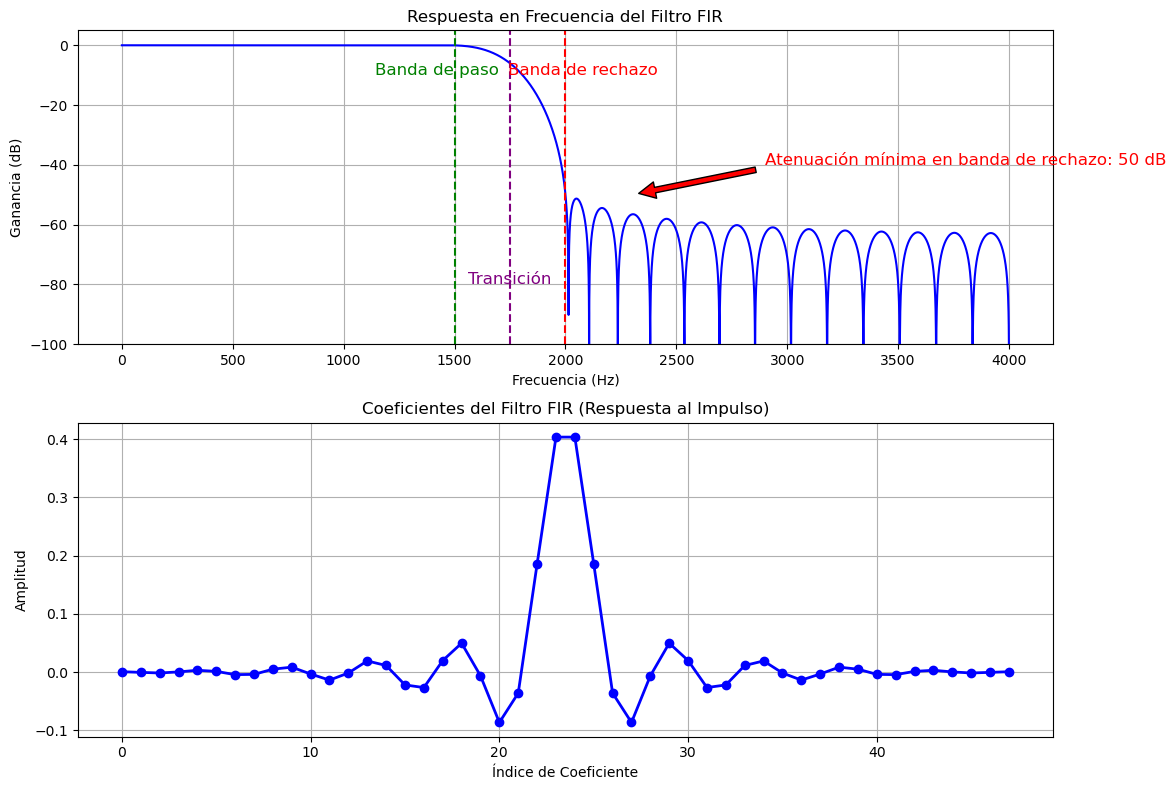

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import kaiserord, firwin, freqz

# Especificaciones del filtro
fs = 8000  # Frecuencia de muestreo (Hz)
f_pass = 1500  # Frecuencia de banda de paso (Hz)
f_stop = 2000  # Frecuencia de banda de rechazo (Hz)
delta_f = f_stop - f_pass  # Ancho de banda de transición (Hz)
attenuation = 50  # Atenuación mínima en banda de rechazo (dB)

# Calcular la frecuencia de corte (frecuencia media entre f_pass y f_stop)
f_corte = (f_pass + f_stop) / 2

# Normalizar las frecuencias con respecto a la frecuencia de muestreo
nyquist = fs / 2
f_corte_normalizada = f_corte / nyquist

# Calcular el orden del filtro y la beta de la ventana de Kaiser
numtaps, beta = kaiserord(attenuation, delta_f / nyquist)

# Diseñar el filtro FIR usando una ventana de Kaiser
fir_coeff = firwin(numtaps, f_corte_normalizada, window=('kaiser', beta))

# Calcular la respuesta en frecuencia del filtro
w, h = freqz(fir_coeff, worN=8000)

# Graficar la respuesta en frecuencia del filtro con etiquetas
plt.figure(figsize=(12, 8))

# Gráfico de la respuesta en frecuencia
plt.subplot(2, 1, 1)
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.ylim(-100, 5)
plt.grid()

# Añadir líneas y etiquetas a las bandas y frecuencia de corte
plt.axvline(f_pass, color='green', linestyle='--', label=f'Banda de paso: {f_pass} Hz')
plt.axvline(f_stop, color='red', linestyle='--', label=f'Banda de rechazo: {f_stop} Hz')
plt.axvline(f_corte, color='purple', linestyle='--', label=f'Frecuencia de corte: {f_corte:.1f} Hz')

# Ajustar la posición exacta de los textos en la gráfica
plt.text(f_pass - 80, -10, 'Banda de paso', color='green', fontsize=12, ha='center')
plt.text(f_stop + 80, -10, 'Banda de rechazo', color='red', fontsize=12, ha='center')
plt.text(f_corte, -80, 'Transición', color='purple', fontsize=12, ha='center')

# Ajustar la posición de la anotación de la atenuación mínima
plt.annotate('Atenuación mínima en banda de rechazo: 50 dB', 
             xy=(f_stop + 300, -50), xytext=(f_stop + 900, -40),  # Mover la anotación más arriba
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

# Graficar la respuesta al impulso del filtro
plt.subplot(2, 1, 2)
plt.plot(fir_coeff, 'bo-', linewidth=2)
plt.title('Coeficientes del Filtro FIR (Respuesta al Impulso)')
plt.xlabel('Índice de Coeficiente')
plt.ylabel('Amplitud')
plt.grid()
plt.tight_layout()

# Mostrar la gráfica
plt.show()


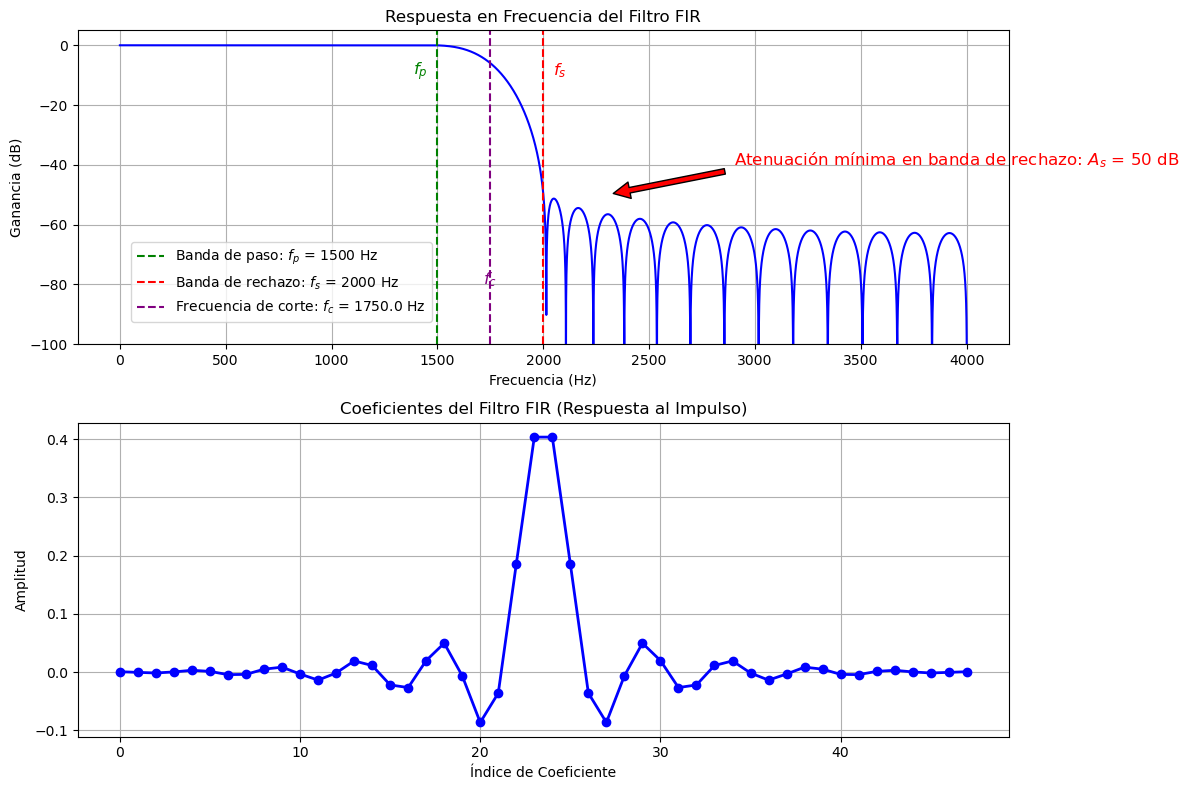

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import kaiserord, firwin, freqz

# Especificaciones del filtro
fs = 8000  # Frecuencia de muestreo (Hz)
f_pass = 1500  # Frecuencia de banda de paso (Hz)
f_stop = 2000  # Frecuencia de banda de rechazo (Hz)
delta_f = f_stop - f_pass  # Ancho de banda de transición (Hz)
attenuation = 50  # Atenuación mínima en banda de rechazo (dB)

# Calcular la frecuencia de corte (frecuencia media entre f_pass y f_stop)
f_corte = (f_pass + f_stop) / 2

# Normalizar las frecuencias con respecto a la frecuencia de muestreo
nyquist = fs / 2
f_corte_normalizada = f_corte / nyquist

# Calcular el orden del filtro y la beta de la ventana de Kaiser
numtaps, beta = kaiserord(attenuation, delta_f / nyquist)

# Diseñar el filtro FIR usando una ventana de Kaiser
fir_coeff = firwin(numtaps, f_corte_normalizada, window=('kaiser', beta))

# Calcular la respuesta en frecuencia del filtro
w, h = freqz(fir_coeff, worN=8000)

# Graficar la respuesta en frecuencia del filtro con etiquetas
plt.figure(figsize=(12, 8))

# Gráfico de la respuesta en frecuencia
plt.subplot(2, 1, 1)
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
plt.title('Respuesta en Frecuencia del Filtro FIR')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.ylim(-100, 5)
plt.grid()

# Añadir líneas y etiquetas a las bandas y frecuencia de corte
plt.axvline(f_pass, color='green', linestyle='--', label=f'Banda de paso: $f_p$ = {f_pass} Hz')
plt.axvline(f_stop, color='red', linestyle='--', label=f'Banda de rechazo: $f_s$ = {f_stop} Hz')
plt.axvline(f_corte, color='purple', linestyle='--', label=f'Frecuencia de corte: $f_c$ = {f_corte:.1f} Hz')

# Ajustar la posición exacta de los textos en la gráfica
plt.text(f_pass - 80, -10, '$f_p$', color='green', fontsize=12, ha='center')
plt.text(f_stop + 80, -10, '$f_s$', color='red', fontsize=12, ha='center')
plt.text(f_corte, -80, '$f_c$', color='purple', fontsize=12, ha='center')

# Ajustar la posición de la anotación de la atenuación mínima
plt.annotate('Atenuación mínima en banda de rechazo: $A_s$ = 50 dB', 
             xy=(f_stop + 300, -50), xytext=(f_stop + 900, -40),  # Mover la anotación más arriba
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

# Leyenda en la gráfica de respuesta en frecuencia
plt.legend(loc='lower left', fontsize=10, bbox_to_anchor=(0.05, 0.05))

# Graficar la respuesta al impulso del filtro
plt.subplot(2, 1, 2)
plt.plot(fir_coeff, 'bo-', linewidth=2)
plt.title('Coeficientes del Filtro FIR (Respuesta al Impulso)')
plt.xlabel('Índice de Coeficiente')
plt.ylabel('Amplitud')
plt.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


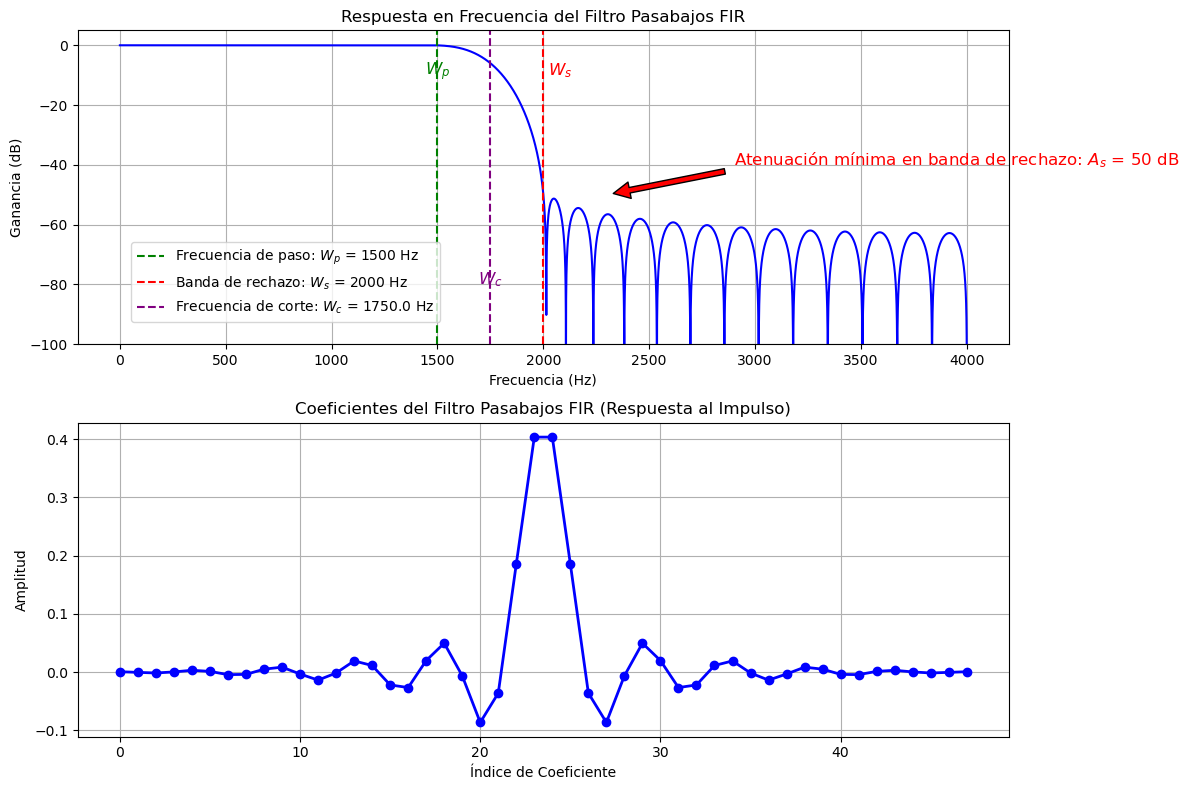

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import kaiserord, firwin, freqz

# Especificaciones del filtro
fs = 8000  # Frecuencia de muestreo (Hz)
f_pass = 1500  # Frecuencia de banda de paso (Hz)
f_stop = 2000  # Frecuencia de banda de rechazo (Hz)
delta_f = f_stop - f_pass  # Ancho de banda de transición (Hz)
attenuation = 50  # Atenuación mínima en banda de rechazo (dB)

# Calcular la frecuencia de corte usando la fórmula Wc = (Wp + Ws) / 2
f_corte = (f_pass + f_stop) / 2

# Normalizar las frecuencias con respecto a la frecuencia de muestreo
nyquist = fs / 2
f_corte_normalizada = f_corte / nyquist

# Calcular el orden del filtro y la beta de la ventana de Kaiser
numtaps, beta = kaiserord(attenuation, delta_f / nyquist)

# Diseñar el filtro FIR pasabajos usando una ventana de Kaiser
fir_coeff = firwin(numtaps, f_corte_normalizada, window=('kaiser', beta))

# Calcular la respuesta en frecuencia del filtro
w, h = freqz(fir_coeff, worN=8000)

# Graficar la respuesta en frecuencia del filtro con etiquetas
plt.figure(figsize=(12, 8))

# Gráfico de la respuesta en frecuencia
plt.subplot(2, 1, 1)
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(np.abs(h)), 'b')
plt.title('Respuesta en Frecuencia del Filtro Pasabajos FIR')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia (dB)')
plt.ylim(-100, 5)
plt.grid()

# Añadir líneas y etiquetas a la frecuencia de corte y banda de rechazo
plt.axvline(f_pass, color='green', linestyle='--', label=f'Frecuencia de paso: $W_p$ = {f_pass} Hz')
plt.axvline(f_stop, color='red', linestyle='--', label=f'Banda de rechazo: $W_s$ = {f_stop} Hz')
plt.axvline(f_corte, color='purple', linestyle='--', label=f'Frecuencia de corte: $W_c$ = {f_corte:.1f} Hz')

# Ajustar la posición exacta de los textos en la gráfica
plt.text(f_pass, -10, '$W_p$', color='green', fontsize=12, ha='center')
plt.text(f_stop + 80, -10, '$W_s$', color='red', fontsize=12, ha='center')
plt.text(f_corte, -80, '$W_c$', color='purple', fontsize=12, ha='center')

# Ajustar la posición de la anotación de la atenuación mínima
plt.annotate('Atenuación mínima en banda de rechazo: $A_s$ = 50 dB', 
             xy=(f_stop + 300, -50), xytext=(f_stop + 900, -40),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

# Leyenda en la gráfica de respuesta en frecuencia
plt.legend(loc='lower left', fontsize=10, bbox_to_anchor=(0.05, 0.05))

# Graficar la respuesta al impulso del filtro
plt.subplot(2, 1, 2)
plt.plot(fir_coeff, 'bo-', linewidth=2)
plt.title('Coeficientes del Filtro Pasabajos FIR (Respuesta al Impulso)')
plt.xlabel('Índice de Coeficiente')
plt.ylabel('Amplitud')
plt.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz

# Parámetros del filtro
M = 52                  # Orden del filtro
fc = 1750               # Frecuencia de corte en Hz
fs = 8000               # Frecuencia de muestreo en Hz
fc_norm = fc / (fs / 2) # Frecuencia de corte normalizada

# Diseño del filtro FIR con la función firwin
h = firwin(numtaps=M+1, cutoff=fc_norm, window='hamming', pass_zero='lowpass')

# Gráfica de la respuesta al impulso
plt.figure()
plt.stem(np.arange(M+1), h, use_line_collection=True)
plt.title('Respuesta al Impulso del Filtro FIR con Ventana de Hamming (firwin)')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid()

# Mostrar respuesta en frecuencia
w, H = freqz(h, worN=1024, fs=fs)
plt.figure()
plt.plot(w, 20 * np.log10(np.abs(H)))
plt.title('Respuesta en Frecuencia del Filtro FIR (firwin)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.grid()
plt.show()

TypeError: stem() got an unexpected keyword argument 'use_line_collection'

<Figure size 640x480 with 0 Axes>

In [1]:
import sympy as sp

# Declarar variables simbólicas
s, omega_c = sp.symbols('s omega_c')

# Función de transferencia del filtro Butterworth de orden 3 pasa bajos
H_s = 1 / (s**3 + 2*s**2 + 2*s + 1)

# Conversión normalizada (s -> s/omega_c)
H_s_normalized = H_s.subs(s, s / omega_c)

# Simplificar la función de transferencia desnormalizada
H_s_desnormalized = sp.simplify(H_s_normalized)

# Mostrar la función de transferencia desnormalizada
H_s_desnormalized


omega_c**3/(omega_c**3 + 2*omega_c**2*s + 2*omega_c*s**2 + s**3)

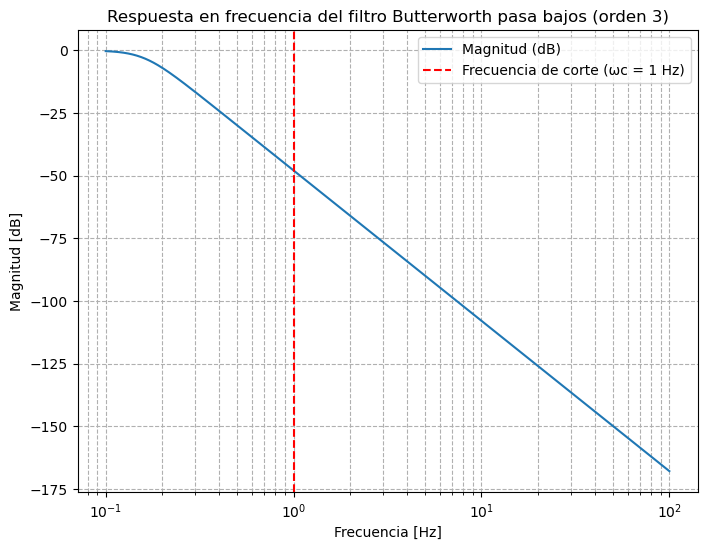

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Declarar variables simbólicas
s, omega_c = sp.symbols('s omega_c')

# Función de transferencia del filtro Butterworth de orden 3 pasa bajos
H_s = 1 / (s**3 + 2*s**2 + 2*s + 1)

# Conversión normalizada (s -> s/omega_c)
H_s_normalized = H_s.subs(s, s / omega_c)

# Frecuencia de corte (ejemplo)
omega_c_value = 1  # Puede ajustarse según el caso
H_s_numeric = H_s_normalized.subs(omega_c, omega_c_value)

# Convertir la función simbólica a función numérica
H_s_lambda = sp.lambdify(s, H_s_numeric, "numpy")

# Crear un rango de frecuencias
frequencies = np.logspace(-1, 2, 400)
s_vals = 1j * 2 * np.pi * frequencies

# Evaluar la magnitud del filtro en función de las frecuencias
H_s_vals = H_s_lambda(s_vals)

# Graficar la respuesta en frecuencia (Bode plot)
plt.figure(figsize=(8, 6))
plt.semilogx(frequencies, 20 * np.log10(np.abs(H_s_vals)), label='Magnitud (dB)')
plt.title('Respuesta en frecuencia del filtro Butterworth pasa bajos (orden 3)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.grid(True, which='both', ls='--')
plt.axvline(x=omega_c_value, color='red', linestyle='--', label=f'Frecuencia de corte (ωc = {omega_c_value} Hz)')
plt.legend()
plt.show()


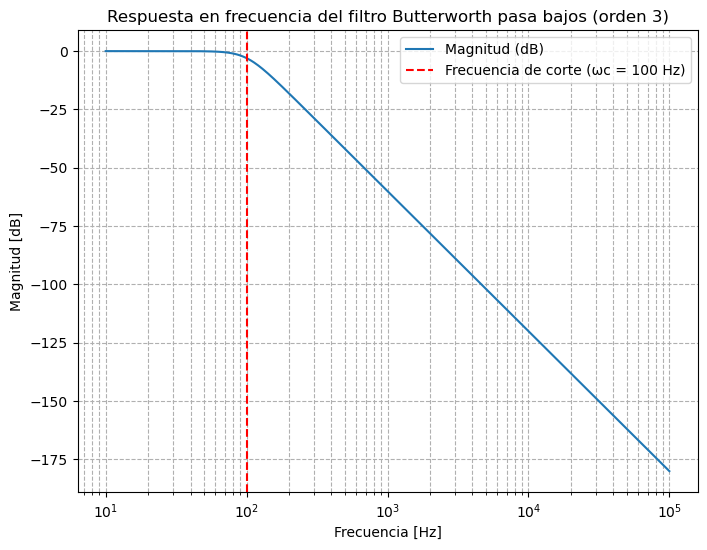

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Declarar variables simbólicas
s, omega_c = sp.symbols('s omega_c')

# Función de transferencia del filtro Butterworth de orden 3 pasa bajos
H_s = 1 / (s**3 + 2*s**2 + 2*s + 1)

# Conversión normalizada (s -> s/omega_c)
H_s_normalized = H_s.subs(s, s / omega_c)

# Frecuencia de corte (omega = 2 * pi * 100)
omega_c_value = 2 * np.pi * 100  # 2pi * 100

# Sustituir la frecuencia de corte en la función de transferencia
H_s_numeric = H_s_normalized.subs(omega_c, omega_c_value)

# Convertir la función simbólica a función numérica
H_s_lambda = sp.lambdify(s, H_s_numeric, "numpy")

# Crear un rango de frecuencias
frequencies = np.logspace(1, 5, 400)  # Cambié el rango para que incluya 100 Hz
s_vals = 1j * 2 * np.pi * frequencies

# Evaluar la magnitud del filtro en función de las frecuencias
H_s_vals = H_s_lambda(s_vals)

# Graficar la respuesta en frecuencia (Bode plot)
plt.figure(figsize=(8, 6))
plt.semilogx(frequencies, 20 * np.log10(np.abs(H_s_vals)), label='Magnitud (dB)')
plt.title('Respuesta en frecuencia del filtro Butterworth pasa bajos (orden 3)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.grid(True, which='both', ls='--')
plt.axvline(x=100, color='red', linestyle='--', label='Frecuencia de corte (ωc = 100 Hz)')
plt.legend()
plt.show()


Función de transferencia normalizada:
          1          
─────────────────────
             2     3 
    2⋅s   2⋅s     s  
1 + ─── + ──── + ────
    ω_c      2      3
          ω_c    ω_c 

Función de transferencia con ωc = 2π(100):
                                     1                                     
───────────────────────────────────────────────────────────────────────────
                     3                        2                            
4.03144180414994e-9⋅s  + 5.06605918211689e-6⋅s  + 0.00318309886183791⋅s + 1


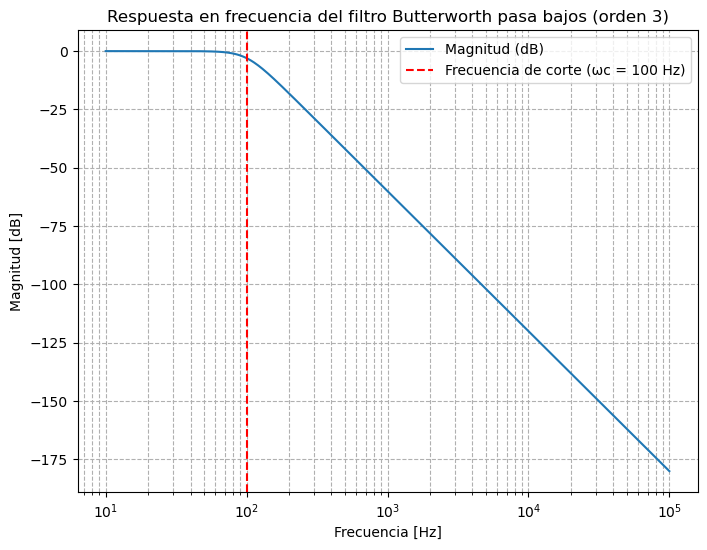

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Declarar variables simbólicas
s, omega_c = sp.symbols('s omega_c')

# Función de transferencia del filtro Butterworth de orden 3 pasa bajos
H_s = 1 / (s**3 + 2*s**2 + 2*s + 1)

# Conversión normalizada (s -> s/omega_c)
H_s_normalized = H_s.subs(s, s / omega_c)

# Frecuencia de corte (omega = 2 * pi * 100)
omega_c_value = 2 * np.pi * 100  # 2pi * 100

# Sustituir la frecuencia de corte en la función de transferencia
H_s_numeric = H_s_normalized.subs(omega_c, omega_c_value)

# Mostrar la función de transferencia del filtro con la frecuencia de corte
print("Función de transferencia normalizada:")
sp.pprint(H_s_normalized)
print("\nFunción de transferencia con ωc = 2π(100):")
sp.pprint(H_s_numeric)

# Convertir la función simbólica a función numérica
H_s_lambda = sp.lambdify(s, H_s_numeric, "numpy")

# Crear un rango de frecuencias
frequencies = np.logspace(1, 5, 400)  # Cambié el rango para que incluya 100 Hz
s_vals = 1j * 2 * np.pi * frequencies

# Evaluar la magnitud del filtro en función de las frecuencias
H_s_vals = H_s_lambda(s_vals)

# Graficar la respuesta en frecuencia (Bode plot)
plt.figure(figsize=(8, 6))
plt.semilogx(frequencies, 20 * np.log10(np.abs(H_s_vals)), label='Magnitud (dB)')
plt.title('Respuesta en frecuencia del filtro Butterworth pasa bajos (orden 3)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud [dB]')
plt.grid(True, which='both', ls='--')
plt.axvline(x=100, color='red', linestyle='--', label='Frecuencia de corte (ωc = 100 Hz)')
plt.legend()
plt.show()


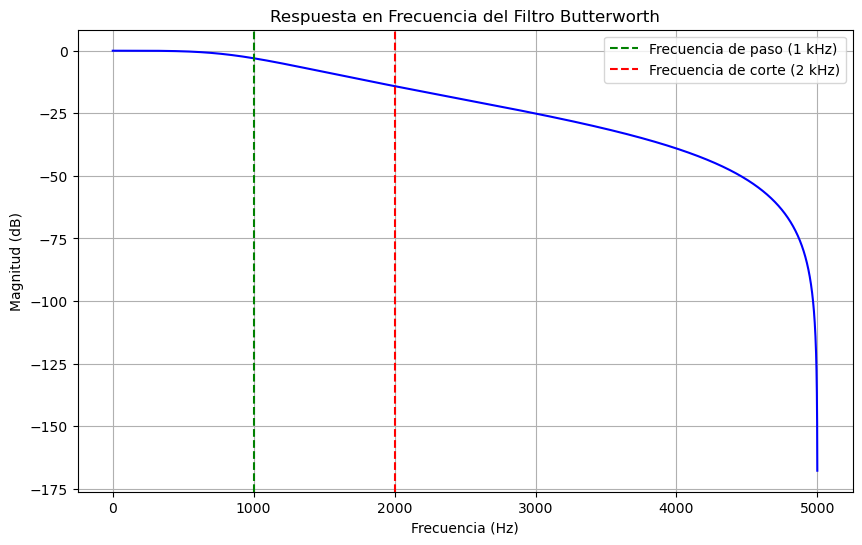

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Especificaciones del filtro
fs = 10000           # Frecuencia de muestreo en Hz
fp = 1000            # Frecuencia de paso en Hz
fc = 2000            # Frecuencia de corte en Hz
Ap_db = 3            # Atenuación máxima en la banda de paso en dB
As_db = 20           # Atenuación mínima en la banda de corte en dB

# Paso 1: Frecuencia de Nyquist
f_nyquist = fs / 2

# Paso 2: Normalización de frecuencias
fp_norm = fp / f_nyquist
fc_norm = fc / f_nyquist

# Paso 3: Conversión de Ap y As de dB a unidades lineales
Ap = 10**(Ap_db / 20)
As = 10**(As_db / 20)

# Cálculo del orden del filtro
n = np.log(np.sqrt((As**2 - 1) / (Ap**2 - 1))) / (2 * np.log(fc_norm / fp_norm))
n = int(np.ceil(n))  # Redondeo hacia arriba al siguiente entero

# Paso 4: Diseño del filtro Butterworth digital
b, a = signal.butter(N=n, Wn=fp_norm, btype='low', analog=False)

# Frecuencia de respuesta del filtro
w, h = signal.freqz(b, a, worN=8000)

# Gráfica de la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(abs(h)), 'b')
plt.title('Respuesta en Frecuencia del Filtro Butterworth')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid()
plt.axvline(fp, color='green', linestyle='--', label='Frecuencia de paso (1 kHz)')
plt.axvline(fc, color='red', linestyle='--', label='Frecuencia de corte (2 kHz)')
plt.legend()
plt.show()


In [2]:
import numpy as np

# Especificaciones del filtro
fs = 10000           # Frecuencia de muestreo en Hz
fp = 1000            # Frecuencia de paso en Hz
fc = 2000            # Frecuencia de corte en Hz
Ap_db = 3            # Atenuación máxima en la banda de paso en dB
As_db = 20           # Atenuación mínima en la banda de corte en dB

# Paso 1: Frecuencia de Nyquist
f_nyquist = fs / 2
print("Frecuencia de Nyquist:", f_nyquist, "Hz")

# Paso 2: Normalización de frecuencias
fp_norm = fp / f_nyquist
fc_norm = fc / f_nyquist
print("Frecuencia de paso normalizada:", fp_norm)
print("Frecuencia de corte normalizada:", fc_norm)

# Paso 3: Conversión de Ap y As de dB a unidades lineales
Ap = 10**(Ap_db / 20)
As = 10**(As_db / 20)
print("Atenuación en la banda de paso (Ap):", Ap)
print("Atenuación en la banda de corte (As):", As)

# Cálculo del orden del filtro
n = np.log(np.sqrt((As**2 - 1) / (Ap**2 - 1))) / (2 * np.log(fc_norm / fp_norm))
n = int(np.ceil(n))  # Redondeo hacia arriba al siguiente entero
print("Orden del filtro (n):", n)


Frecuencia de Nyquist: 5000.0 Hz
Frecuencia de paso normalizada: 0.2
Frecuencia de corte normalizada: 0.4
Atenuación en la banda de paso (Ap): 1.4125375446227544
Atenuación en la banda de corte (As): 10.0
Orden del filtro (n): 2


Paso 1 - Frecuencia de Nyquist: 5000.0 Hz
Paso 2 - Frecuencia de paso normalizada: 0.2
Paso 2 - Frecuencia de corte normalizada: 0.4
Paso 3 - Atenuación en la banda de paso (Ap): 1.4125375446227544
Paso 3 - Atenuación en la banda de corte (As): 10.0
Paso 3 - Orden del filtro (n): 2
Paso 4 - Coeficientes del filtro Butterworth:
Numerador (b): [0.06745527 0.13491055 0.06745527]
Denominador (a): [ 1.        -1.1429805  0.4128016]


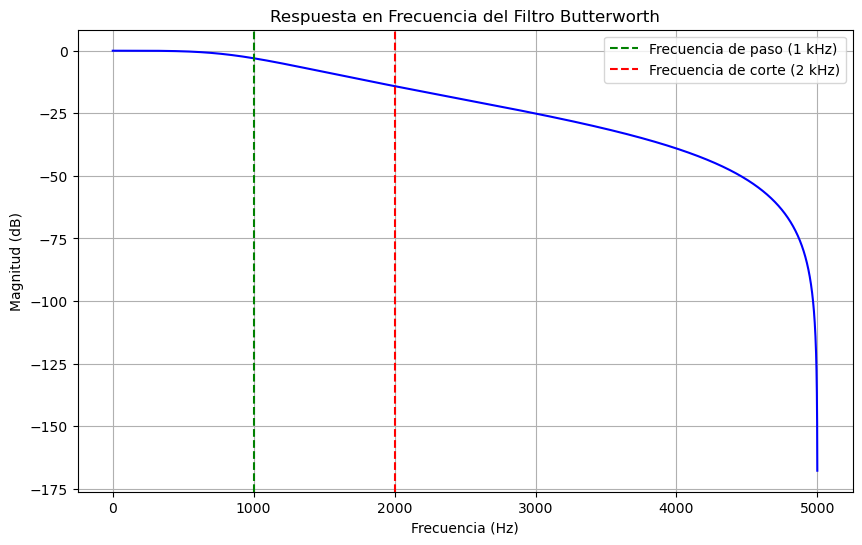

In [3]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Especificaciones del filtro
fs = 10000           # Frecuencia de muestreo en Hz
fp = 1000            # Frecuencia de paso en Hz
fc = 2000            # Frecuencia de corte en Hz
Ap_db = 3            # Atenuación máxima en la banda de paso en dB
As_db = 20           # Atenuación mínima en la banda de corte en dB

# Paso 1: Frecuencia de Nyquist
f_nyquist = fs / 2
print("Paso 1 - Frecuencia de Nyquist:", f_nyquist, "Hz")

# Paso 2: Normalización de frecuencias
fp_norm = fp / f_nyquist
fc_norm = fc / f_nyquist
print("Paso 2 - Frecuencia de paso normalizada:", fp_norm)
print("Paso 2 - Frecuencia de corte normalizada:", fc_norm)

# Paso 3: Conversión de Ap y As de dB a unidades lineales y cálculo del orden del filtro
Ap = 10**(Ap_db / 20)
As = 10**(As_db / 20)
print("Paso 3 - Atenuación en la banda de paso (Ap):", Ap)
print("Paso 3 - Atenuación en la banda de corte (As):", As)

# Cálculo del orden del filtro
n = np.log(np.sqrt((As**2 - 1) / (Ap**2 - 1))) / (2 * np.log(fc_norm / fp_norm))
n = int(np.ceil(n))  # Redondeo hacia arriba al siguiente entero
print("Paso 3 - Orden del filtro (n):", n)

# Paso 4: Diseño del filtro Butterworth digital
b, a = signal.butter(N=n, Wn=fp_norm, btype='low', analog=False)
print("Paso 4 - Coeficientes del filtro Butterworth:")
print("Numerador (b):", b)
print("Denominador (a):", a)

# Frecuencia de respuesta del filtro
w, h = signal.freqz(b, a, worN=8000)

# Gráfica de la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(abs(h)), 'b')
plt.title('Respuesta en Frecuencia del Filtro Butterworth')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid()
plt.axvline(fp, color='green', linestyle='--', label='Frecuencia de paso (1 kHz)')
plt.axvline(fc, color='red', linestyle='--', label='Frecuencia de corte (2 kHz)')
plt.legend()
plt.show()


Paso 1 - Frecuencia de Nyquist: 5000.0 Hz
Paso 2 - Frecuencia de paso normalizada: 0.2
Paso 2 - Frecuencia de corte normalizada: 0.4
Paso 3 - Atenuación en la banda de paso (Ap): 1.4125375446227544
Paso 3 - Atenuación en la banda de corte (As): 10.0
Paso 3 - Orden del filtro (n): 4
Paso 4 - Coeficientes del filtro Butterworth:
Numerador (b): [0.00482434 0.01929737 0.02894606 0.01929737 0.00482434]
Denominador (a): [ 1.         -2.36951301  2.31398841 -1.05466541  0.18737949]


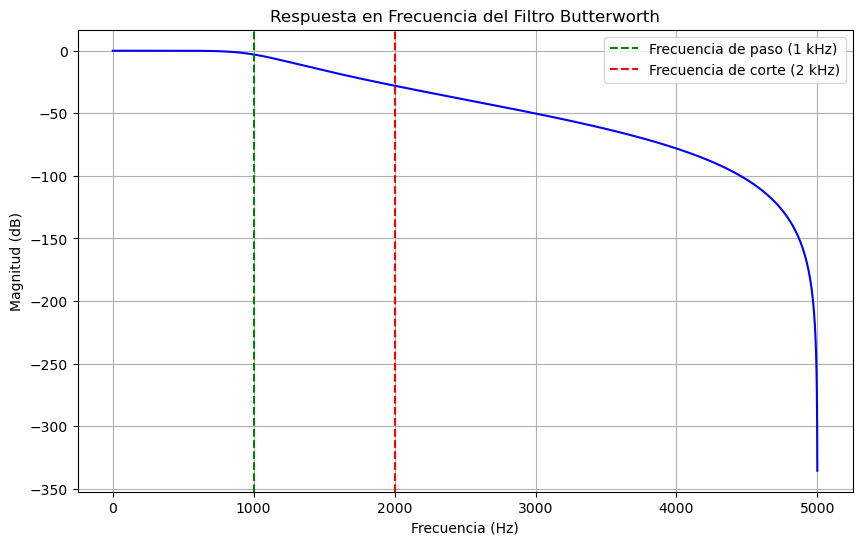

In [5]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Especificaciones del filtro
fs = 10000           # Frecuencia de muestreo en Hz
fp = 1000            # Frecuencia de paso en Hz
fc = 2000            # Frecuencia de corte en Hz
Ap_db = 3            # Atenuación máxima en la banda de paso en dB
As_db = 20           # Atenuación mínima en la banda de corte en dB

# Paso 1: Frecuencia de Nyquist
f_nyquist = fs / 2
print("Paso 1 - Frecuencia de Nyquist:", f_nyquist, "Hz")

# Paso 2: Normalización de frecuencias
fp_norm = fp / f_nyquist
fc_norm = fc / f_nyquist
print("Paso 2 - Frecuencia de paso normalizada:", fp_norm)
print("Paso 2 - Frecuencia de corte normalizada:", fc_norm)

# Paso 3: Conversión de Ap y As de dB a unidades lineales y cálculo del orden del filtro
Ap = 10**(Ap_db / 20)
As = 10**(As_db / 20)
print("Paso 3 - Atenuación en la banda de paso (Ap):", Ap)
print("Paso 3 - Atenuación en la banda de corte (As):", As)

# Cálculo del orden del filtro
n = np.log10((10**(As_db / 10) - 1) / (10**(Ap_db / 10) - 1)) / (2 * np.log10(fc_norm / fp_norm))
n = int(np.ceil(n))  # Redondeo hacia arriba al siguiente entero
print("Paso 3 - Orden del filtro (n):", n)

# Paso 4: Diseño del filtro Butterworth digital
b, a = signal.butter(N=n, Wn=fp_norm, btype='low', analog=False)
print("Paso 4 - Coeficientes del filtro Butterworth:")
print("Numerador (b):", b)
print("Denominador (a):", a)

# Frecuencia de respuesta del filtro
w, h = signal.freqz(b, a, worN=8000)

# Gráfica de la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(abs(h)), 'b')
plt.title('Respuesta en Frecuencia del Filtro Butterworth')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid()
plt.axvline(fp, color='green', linestyle='--', label='Frecuencia de paso (1 kHz)')
plt.axvline(fc, color='red', linestyle='--', label='Frecuencia de corte (2 kHz)')
plt.legend()
plt.show()


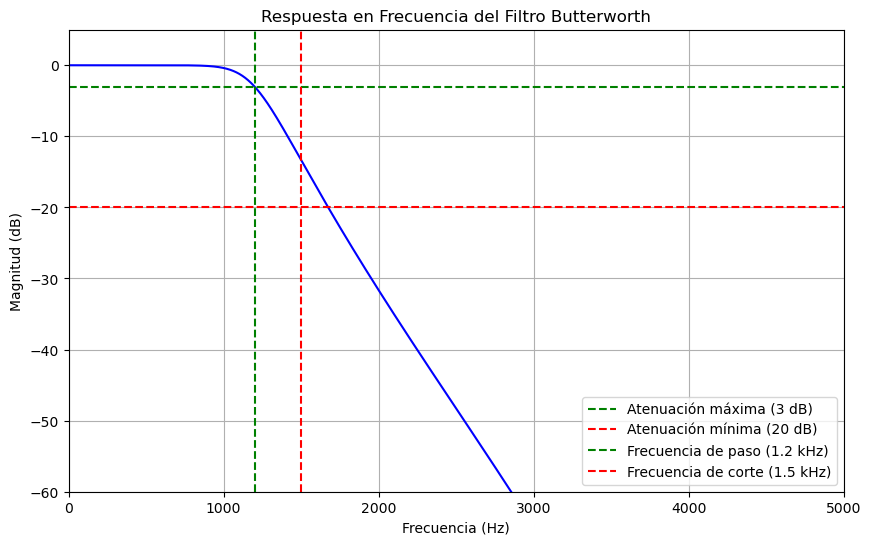

6


In [10]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Especificaciones del filtro
fs = 10000           # Frecuencia de muestreo en Hz
fp = 1200            # Frecuencia de paso en Hz
fc = 1500            # Frecuencia de corte en Hz
Ap_db = 3            # Atenuación máxima en la banda de paso en dB
As_db = 20           # Atenuación mínima en la banda de corte en dB

# Paso 1: Frecuencia de Nyquist
f_nyquist = fs / 2

# Paso 2: Normalización de frecuencias
fp_norm = fp / f_nyquist
fc_norm = fc / f_nyquist

# Paso 3: Conversión de Ap y As de dB a unidades lineales
Ap = 10**(Ap_db / 20)
As = 10**(As_db / 20)

# Cálculo del orden del filtro
n = np.log(np.sqrt((As**2 - 1) / (Ap**2 - 1))) / (2 * np.log(fc_norm / fp_norm))
n = int(np.ceil(n))  # Redondeo hacia arriba al siguiente entero

# Paso 4: Diseño del filtro Butterworth digital
b, a = signal.butter(N=n, Wn=fp_norm, btype='low', analog=False)

# Frecuencia de respuesta del filtro
w, h = signal.freqz(b, a, worN=8000)

# Gráfica de la respuesta en frecuencia
plt.figure(figsize=(10, 6))
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(abs(h)), 'b')
plt.title('Respuesta en Frecuencia del Filtro Butterworth')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.axhline(-Ap_db, color='green', linestyle='--', label='Atenuación máxima (3 dB)')
plt.axhline(-As_db, color='red', linestyle='--', label='Atenuación mínima (20 dB)')
plt.axvline(fp, color='green', linestyle='--', label='Frecuencia de paso (1.2 kHz)')
plt.axvline(fc, color='red', linestyle='--', label='Frecuencia de corte (1.5 kHz)')
plt.grid()
plt.legend()
plt.xlim(0, fs / 2)
plt.ylim(-60, 5)
plt.show()


In [11]:
import numpy as np

# Parámetros del filtro
fs = 10000          # Frecuencia de muestreo en Hz
fp = 1200           # Frecuencia de paso en Hz
fc = 1500           # Frecuencia de corte en Hz
Ap_db = 3           # Atenuación máxima en la banda de paso en dB
As_db = 20          # Atenuación mínima en la banda de corte en dB

# Calcular el orden del filtro
def calcular_orden_filtro(Ap_db, As_db, fp, fc):
    A_p = 10 ** (Ap_db / 10) - 1
    A_s = 10 ** (As_db / 10) - 1
    
    n = np.ceil(np.log10((A_s / A_p)) / (2 * np.log10(fc / fp)))
    return int(n)

orden_filtro = calcular_orden_filtro(Ap_db, As_db, fp, fc)
print("El orden del filtro es:", orden_filtro)


El orden del filtro es: 11


In [12]:
import numpy as np

# Parámetros del filtro
fs = 10000          # Frecuencia de muestreo en Hz
fp = 1200           # Frecuencia de paso en Hz
fc = 1500           # Frecuencia de corte en Hz
Ap_db = 3           # Atenuación máxima en la banda de paso en dB
As_db = 20          # Atenuación mínima en la banda de corte en dB

# Calcular el orden del filtro usando la nueva fórmula
def calcular_orden_filtro(Ap_db, As_db, fs, fp):
    # Convertir dB a magnitudes
    Ap = 10 ** (Ap_db / 10)
    As = 10 ** (As_db / 10)

    # Calcular el orden del filtro
    n = np.log(np.sqrt(As**2 - 1) / np.sqrt(Ap**2 - 1)) / (2 * np.log(fs / fp))
    return np.ceil(n)  # Redondear hacia arriba

orden_filtro = calcular_orden_filtro(Ap_db, As_db, fs, fp)
print("El orden del filtro es:", int(orden_filtro))


El orden del filtro es: 1


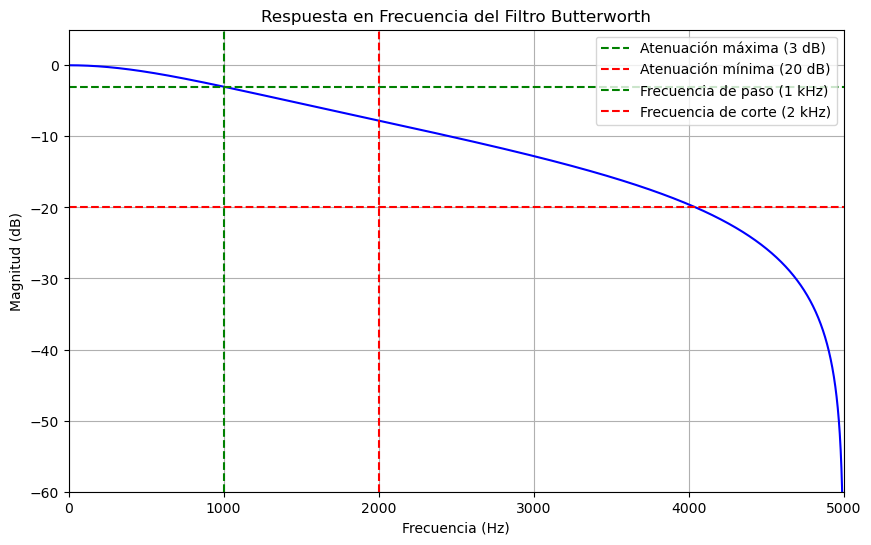

In [14]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# --- Especificaciones del filtro ---
fs = 10000           # Frecuencia de muestreo en Hz (10 kHz)
fp = 1000            # Frecuencia de paso en Hz (1 kHz)
bw_p = 100           # Ancho de banda en la banda de paso (100 Hz)
fc = 2000            # Frecuencia de corte en Hz (2 kHz)
bw_s = 200           # Ancho de banda en la banda de corte (200 Hz)
Ap_db = 3            # Atenuación máxima en la banda de paso (3 dB)
As_db = 20           # Atenuación mínima en la banda de corte (20 dB)

# --- Paso 1: Frecuencia de Nyquist ---
f_nyquist = fs / 2  # Frecuencia de Nyquist

# --- Paso 2: Normalización de frecuencias ---
fp_norm = fp / f_nyquist  # Frecuencia de paso normalizada
fc_norm = fc / f_nyquist  # Frecuencia de corte normalizada

# --- Paso 3: Conversión de Ap y As de dB a unidades lineales ---
Ap = 10 ** (Ap_db / 10)   # Conversión de la atenuación máxima a magnitud
As = 10 ** (As_db / 10)   # Conversión de la atenuación mínima a magnitud

# --- Paso 4: Cálculo del orden del filtro ---
# Cálculo del orden utilizando la fórmula de diseño Butterworth
n = np.log(np.sqrt(As**2 - 1) / np.sqrt(Ap**2 - 1)) / (2 * np.log(fs / fp))
n = int(np.ceil(n))  # Redondeo hacia arriba al siguiente entero

# --- Paso 5: Diseño del filtro Butterworth digital ---
b, a = signal.butter(N=n, Wn=fp_norm, btype='low', analog=False)  # Diseño del filtro

# --- Paso 6: Frecuencia de respuesta del filtro ---
w, h = signal.freqz(b, a, worN=8000)  # Respuesta en frecuencia del filtro

# --- Paso 7: Gráfica de la respuesta en frecuencia ---
plt.figure(figsize=(10, 6))
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(abs(h)), 'b')  # Magnitud en dB
plt.title('Respuesta en Frecuencia del Filtro Butterworth')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.axhline(-Ap_db, color='green', linestyle='--', label='Atenuación máxima (3 dB)')
plt.axhline(-As_db, color='red', linestyle='--', label='Atenuación mínima (20 dB)')
plt.axvline(fp, color='green', linestyle='--', label='Frecuencia de paso (1 kHz)')
plt.axvline(fc, color='red', linestyle='--', label='Frecuencia de corte (2 kHz)')
plt.grid()
plt.legend()
plt.xlim(0, fs / 2)  # Limitar el eje x hasta la frecuencia de Nyquist
plt.ylim(-60, 5)     # Limitar el eje y
plt.show()  # Mostrar la gráfica


Paso 1 - Frecuencia de Nyquist: 5000.0 Hz
Paso 2 - Frecuencia de paso normalizada: 0.2
Paso 2 - Frecuencia de corte normalizada: 0.4
Paso 3 - Atenuación en la banda de paso (Ap): 1.9952623149688795
Paso 3 - Atenuación en la banda de corte (As): 100.0
Paso 3 - Orden del filtro (n): 1
Paso 4 - Coeficientes del filtro Butterworth:
Numerador (b): [0.24523728 0.24523728]
Denominador (a): [ 1.         -0.50952545]


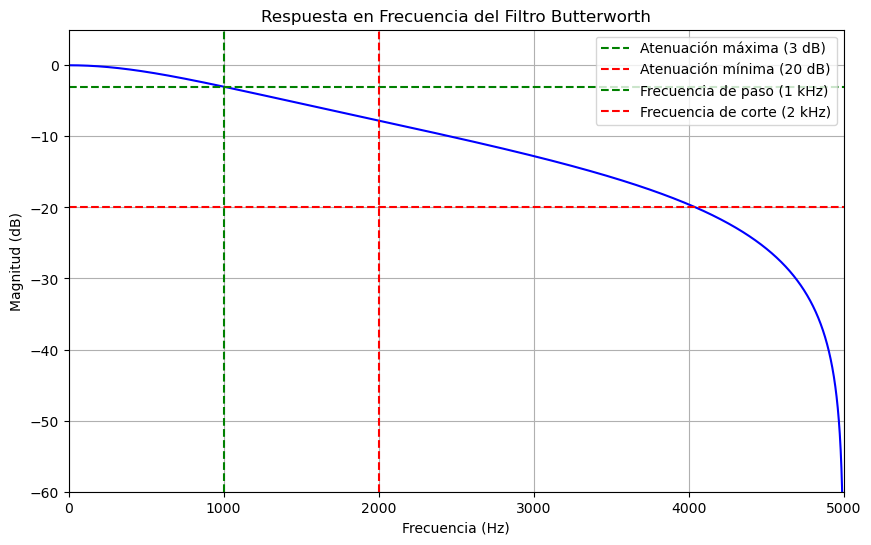

In [15]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# --- Especificaciones del filtro ---
fs = 10000           # Frecuencia de muestreo en Hz (10 kHz)
fp = 1000            # Frecuencia de paso en Hz (1 kHz)
bw_p = 100           # Ancho de banda en la banda de paso (100 Hz)
fc = 2000            # Frecuencia de corte en Hz (2 kHz)
bw_s = 200           # Ancho de banda en la banda de corte (200 Hz)
Ap_db = 3            # Atenuación máxima en la banda de paso (3 dB)
As_db = 20           # Atenuación mínima en la banda de corte (20 dB)

# --- Paso 1: Frecuencia de Nyquist ---
f_nyquist = fs / 2  # Frecuencia de Nyquist
print(f"Paso 1 - Frecuencia de Nyquist: {f_nyquist} Hz")

# --- Paso 2: Normalización de frecuencias ---
fp_norm = fp / f_nyquist  # Frecuencia de paso normalizada
fc_norm = fc / f_nyquist  # Frecuencia de corte normalizada
print(f"Paso 2 - Frecuencia de paso normalizada: {fp_norm}")
print(f"Paso 2 - Frecuencia de corte normalizada: {fc_norm}")

# --- Paso 3: Conversión de Ap y As de dB a unidades lineales ---
Ap = 10 ** (Ap_db / 10)   # Conversión de la atenuación máxima a magnitud
As = 10 ** (As_db / 10)   # Conversión de la atenuación mínima a magnitud
print(f"Paso 3 - Atenuación en la banda de paso (Ap): {Ap}")
print(f"Paso 3 - Atenuación en la banda de corte (As): {As}")

# --- Paso 4: Cálculo del orden del filtro ---
# Cálculo del orden utilizando la fórmula de diseño Butterworth
n = np.log(np.sqrt(As**2 - 1) / np.sqrt(Ap**2 - 1)) / (2 * np.log(fs / fp))
n = int(np.ceil(n))  # Redondeo hacia arriba al siguiente entero
print(f"Paso 3 - Orden del filtro (n): {n}")

# --- Paso 5: Diseño del filtro Butterworth digital ---
b, a = signal.butter(N=n, Wn=fp_norm, btype='low', analog=False)  # Diseño del filtro
print("Paso 4 - Coeficientes del filtro Butterworth:")
print(f"Numerador (b): {b}")
print(f"Denominador (a): {a}")

# --- Paso 6: Frecuencia de respuesta del filtro ---
w, h = signal.freqz(b, a, worN=8000)  # Respuesta en frecuencia del filtro

# --- Paso 7: Gráfica de la respuesta en frecuencia ---
plt.figure(figsize=(10, 6))
plt.plot(0.5 * fs * w / np.pi, 20 * np.log10(abs(h)), 'b')  # Magnitud en dB
plt.title('Respuesta en Frecuencia del Filtro Butterworth')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.axhline(-Ap_db, color='green', linestyle='--', label='Atenuación máxima (3 dB)')
plt.axhline(-As_db, color='red', linestyle='--', label='Atenuación mínima (20 dB)')
plt.axvline(fp, color='green', linestyle='--', label='Frecuencia de paso (1 kHz)')
plt.axvline(fc, color='red', linestyle='--', label='Frecuencia de corte (2 kHz)')
plt.grid()
plt.legend()
plt.xlim(0, fs / 2)  # Limitar el eje x hasta la frecuencia de Nyquist
plt.ylim(-60, 5)     # Limitar el eje y
plt.show()  # Mostrar la gráfica


findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBr

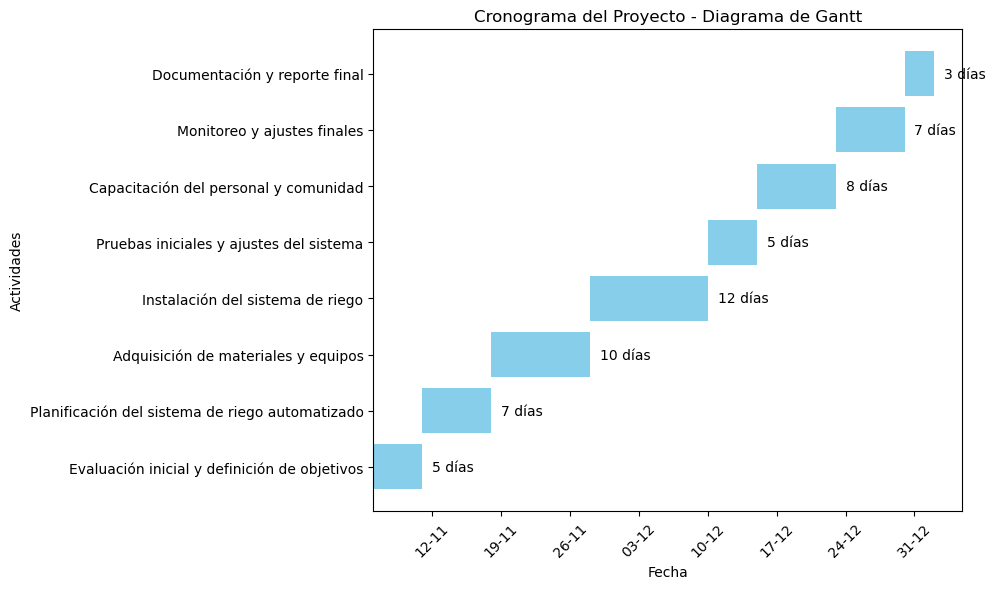

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Crear un cronograma inicial con actividades y duraciones estimadas
data = {
    'Actividad': [
        'Evaluación inicial y definición de objetivos',
        'Planificación del sistema de riego automatizado',
        'Adquisición de materiales y equipos',
        'Instalación del sistema de riego',
        'Pruebas iniciales y ajustes del sistema',
        'Capacitación del personal y comunidad',
        'Monitoreo y ajustes finales',
        'Documentación y reporte final'
    ],
    'Duración (días)': [5, 7, 10, 12, 5, 8, 7, 3]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Fecha de inicio del proyecto
start_date = datetime(2024, 11, 6)

# Calcular fechas de inicio y fin para cada actividad
df['Fecha de Inicio'] = [start_date + timedelta(days=int(df['Duración (días)'][:i].sum())) for i in range(len(df))]
df['Fecha de Fin'] = df['Fecha de Inicio'] + df['Duración (días)'].apply(lambda x: timedelta(days=x))

# Crear diagrama de Gantt
fig, ax = plt.subplots(figsize=(10, 6))
for i, row in df.iterrows():
    ax.barh(row['Actividad'], (row['Fecha de Fin'] - row['Fecha de Inicio']).days, left=row['Fecha de Inicio'], color='skyblue')
    ax.text(row['Fecha de Fin'] + timedelta(days=1), i, f"{(row['Fecha de Fin'] - row['Fecha de Inicio']).days} días", va='center')

# Formato de la gráfica
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Actividades')
plt.title('Cronograma del Proyecto - Diagrama de Gantt')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBr

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\mnt\\data\\cronograma_gantt_ajustado.png'

findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBrainsMono-Bold' not found.
findfont: Font family 'JetBr

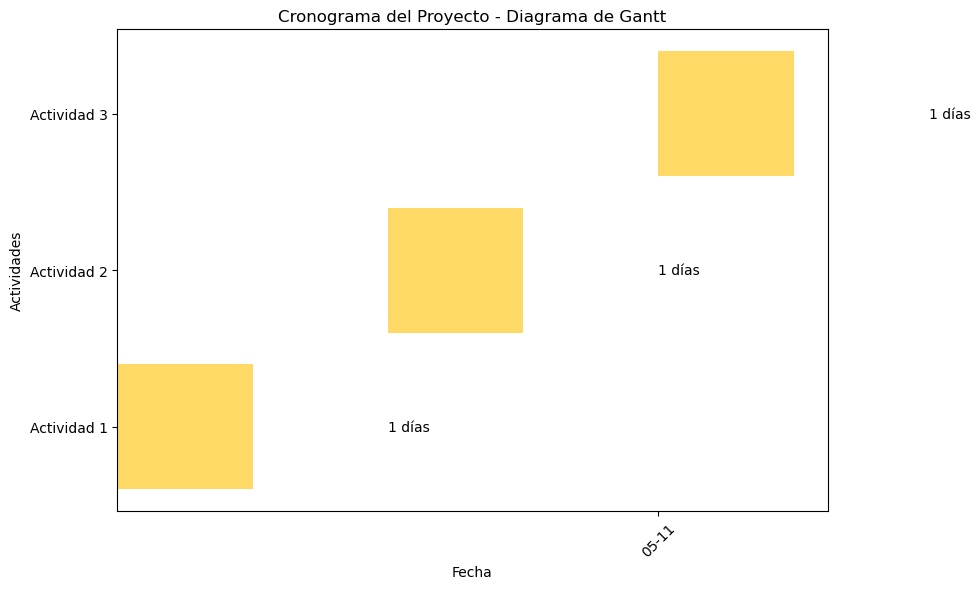

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta
from pptx import Presentation
from pptx.util import Inches

# Importar la fuente
import matplotlib.font_manager as fm

# Crear un DataFrame de ejemplo
data = {
    'Actividad': ['Actividad 1', 'Actividad 2', 'Actividad 3'],
    'Fecha de Inicio': [pd.Timestamp('2024-11-01'), pd.Timestamp('2024-11-03'), pd.Timestamp('2024-11-05')],
    'Fecha de Fin': [pd.Timestamp('2024-11-02'), pd.Timestamp('2024-11-04'), pd.Timestamp('2024-11-06')]
}
df = pd.DataFrame(data)

# Configurar estilo de la fuente JetBrains Mono y color amarillo (#FFD966)
plt.rcParams['font.family'] = 'JetBrainsMono-Bold'
color = '#FFD966'

# Crear nuevamente el diagrama de Gantt con los ajustes solicitados
fig, ax = plt.subplots(figsize=(10, 6))
for i, row in df.iterrows():
    ax.barh(row['Actividad'], (row['Fecha de Fin'] - row['Fecha de Inicio']).days, left=row['Fecha de Inicio'], color=color)
    ax.text(row['Fecha de Fin'] + timedelta(days=1), i, f"{(row['Fecha de Fin'] - row['Fecha de Inicio']).days} días", va='center', color='black')

# Formato de la gráfica
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Actividades')
plt.title('Cronograma del Proyecto - Diagrama de Gantt', color='black')
plt.tight_layout()

# Guardar el gráfico ajustado como imagen
fig.savefig("/mnt/data/cronograma_gantt_ajustado.png", format='png')

# Crear una nueva presentación y agregar la imagen ajustada
prs = Presentation()
slide_layout = prs.slide_layouts[5]  # Layout en blanco
slide = prs.slides.add_slide(slide_layout)

# Añadir la imagen del gráfico a la diapositiva
left = Inches(1)
top = Inches(1)
slide.shapes.add_picture("/mnt/data/cronograma_gantt_ajustado.png", left, top, height=Inches(5))

# Guardar la presentación con los ajustes
pptx_file_path_ajustado = "/mnt/data/Cronograma_Proyecto_Gantt_Ajustado.pptx"
prs.save(pptx_file_path_ajustado)

pptx_file_path_ajustado 


In [4]:
pip install python-pptx

Note: you may need to restart the kernel to use updated packages.
